In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv('data/Bengaluru_House_Data.csv')

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1644,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,500,1.0,1.0,17.00
1255,Plot Area,Ready To Move,Whitefield,4 Bedroom,Pronege,4800,4.0,3.0,525.00
5054,Super built-up Area,18-Dec,Hennur Road,2 BHK,Koagati,1036,2.0,1.0,59.45
4957,Built-up Area,Ready To Move,Kammanahalli,3 Bedroom,NaN,540,3.0,1.0,60.00
8316,Built-up Area,Ready To Move,Gowdanapalya,1 Bedroom,NaN,510,1.0,0.0,34.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
#percentage missing in cols
(df.isnull().sum() / df.shape[0]) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
#since society have 41% missing value so this feature will get droped
df.drop(columns=['society'],inplace=True)

In [9]:
#checking unique values in all columns
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [10]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: count, dtype: float64
availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64
location
Whitefield                        4.054054
Sarjapur  Road                    2.995495
Electronic City                   2.267267
Kanakpura Road                    2.049550
Thanisandra                       1.756757
                                    ...   
Bapuji Layout                     0.007508
1st Stage Radha Krishna Layout    0.007508
BEML Layout 5th stage             0.007508
singapura paradise                0.007508
Abshot Layout                     0.0

<h3>Analysis of area_type column:</h3>

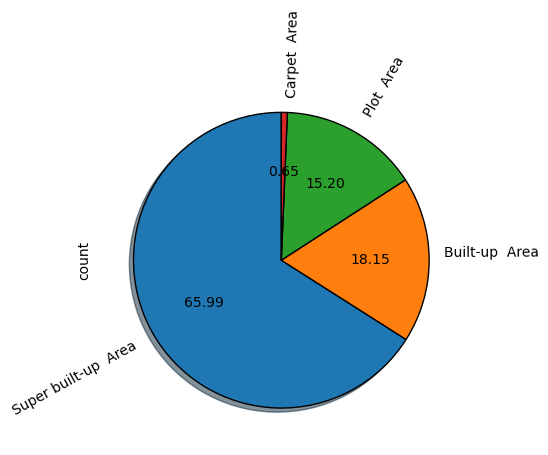

In [11]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

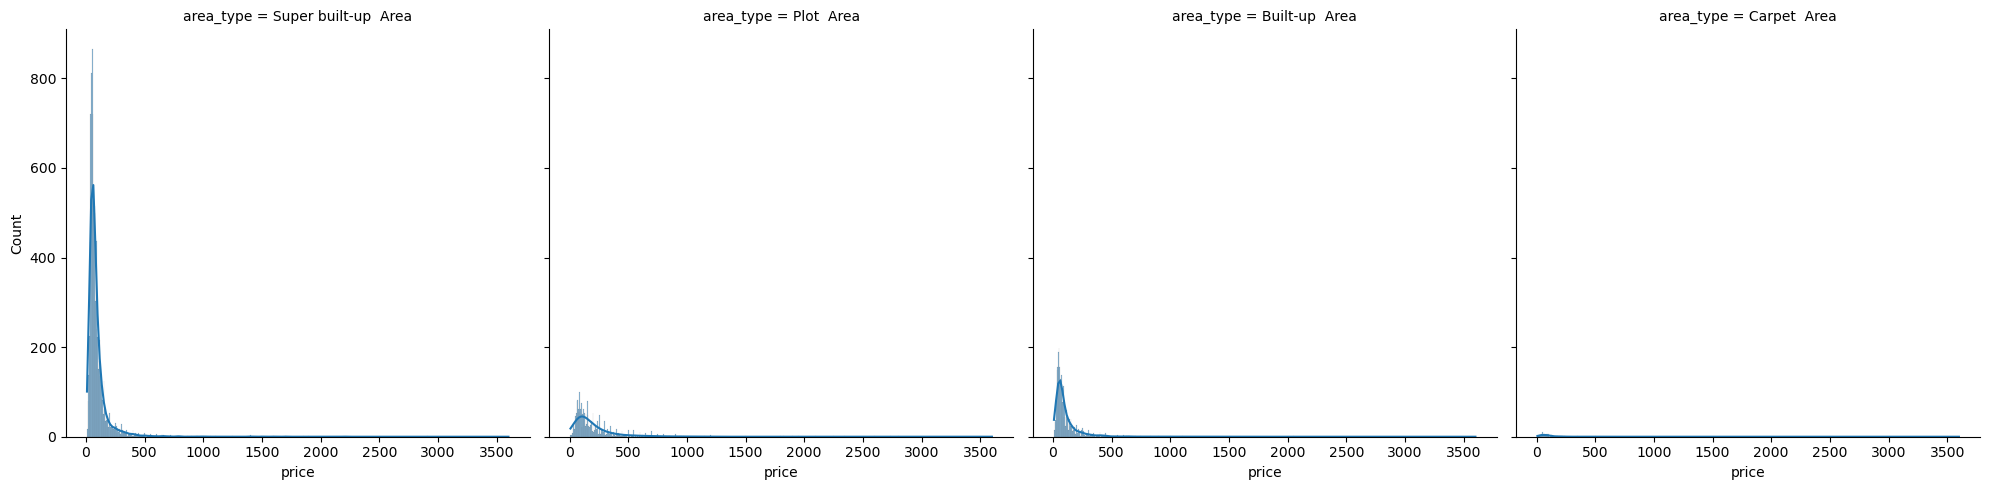

In [12]:
sns.displot(df, x="price", col="area_type", kde=True, col_wrap=4)
plt.show()

In [13]:
# area_type have 4 categories out of which one is 66% and also probablity density function of
# all four category is almost same so droping this feature
df.drop(columns=['area_type'],inplace=True)

<h3>Analysis of availability column:</h3>

In [14]:
(df['availability'].value_counts()/df.shape[0])*100

availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64

In [15]:
# availability have 81 categories but one value is around 80% so this feature is not usefull
df.drop(columns=['availability'],inplace=True)

In [16]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
3120,JP Nagar,2 BHK,1200,2.0,2.0,62.00
5131,Uttarahalli,2 BHK,1050,2.0,1.0,42.00
5809,Talaghattapura,2 BHK,951,2.0,2.0,30.43


<h3>Analysis of location column:</h3>

In [17]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [18]:
df['location'].isna().sum()

1

In [19]:
#filling missing value with mode
df['location'] = df['location'].fillna('Whitefield')

In [20]:
df['location'].nunique()

1305

In [21]:
location_counts = df['location'].value_counts()

In [22]:
len(location_counts[location_counts<=10])

1064

In [23]:
len(location_counts[location_counts>10])

241

In [24]:
# There are 1064 locations with 10 or fewer occurrences.
# To reduce the number of unique categories, these locations will be grouped under a new category named "other".
df['location'] = df['location'].apply(lambda x:'other' if location_counts[x]<=10 else x)

In [25]:
df['location'].nunique()

242

now there are only 242 categories 

In [26]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
6718,CV Raman Nagar,3 BHK,1590,2.0,3.0,85.00
11996,other,3 BHK,1410,2.0,2.0,43.71
3781,Hebbal,3 BHK,2400,4.0,1.0,180.00


<h3>Analysis of size column:</h3>

In [27]:
# now let's work on size column
df['size'].isnull().sum()

16

In [28]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [29]:
# filling missing value with 2 BHK
df['size'] = df['size'].fillna('2 BHK')

In [30]:
df['size'].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

The 'size' column contains two types of categories: 'Bedroom' and 'BHK'.<br>
To ensure consistency, this needs to be standardized.<br>
making a new column BHK 

In [31]:
df['BHK'] = df['size'].str.split(' ').str[0].astype(int)

In [32]:
df['BHK'].value_counts()

BHK
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

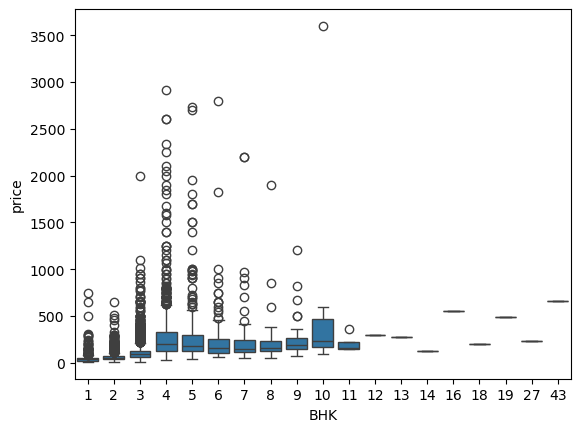

In [33]:
sns.boxplot(x=df['BHK'],y=df['price'])
plt.show()

there are many outliers that need to be fixed,will fixed later

In [34]:
# removinf size column
df.drop(columns=['size'],inplace=True)

In [35]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
6527,Kasavanhalli,1494,3.0,2.0,82.0,3
9765,7th Phase JP Nagar,1130,2.0,2.0,85.0,2
8004,Sarjapur Road,7800,6.0,NaN,385.0,5
8287,Banaswadi,1600,3.0,2.0,74.5,3
1845,Hulimavu,1100,2.0,2.0,71.5,2


<h3> Analysis of total_sqft column:</h3>

In [36]:
df['total_sqft'].nunique()

2117

In [37]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
# there are few values in ranges 
def convert_ranges_to_sqft(x):
    temp = x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
df['total_sqft'] = df['total_sqft'].apply(convert_ranges_to_sqft)

In [40]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK
6449,Kundalahalli,1047.0,2.0,1.0,82.62,2
7771,Kundalahalli,1010.0,2.0,1.0,48.27,2
2728,Rachenahalli,1050.0,2.0,2.0,52.50,2


<h4>creating a new columns price per sqft because it's a very important feature in real state:</h4>

In [41]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [42]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [43]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13247.000000,12711.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,1.584376,112.565627,2.802778,7.907501e+03
std,1238.405258,1.341458,0.817263,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [44]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9828,Banashankari,675.0,4.0,0.0,140.00,4,20740.740741
8333,Begur Road,1565.0,2.0,2.0,56.34,3,3600.000000
7007,other,1200.0,3.0,2.0,99.00,3,8250.000000


<h2>Analysis of bath column:</h2>

In [45]:
df['bath'].nunique()

19

In [47]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [48]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [46]:
df['bath'].isnull().sum()

73

In [49]:
#filling missing value with median
df['bath'] = df['bath'].fillna(df['bath'].median())

<Axes: xlabel='bath', ylabel='count'>

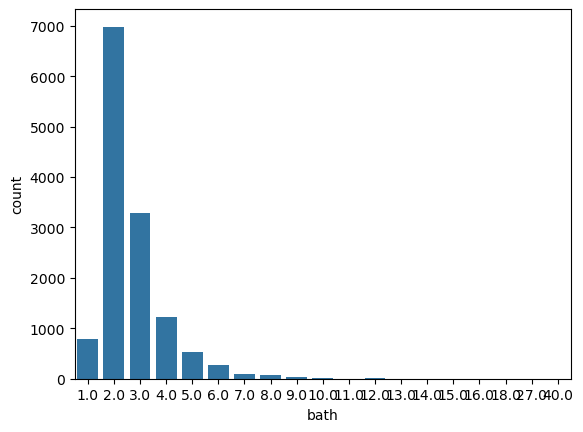

In [50]:
sns.countplot(x=df['bath'])

This column contains outliers, which will be handled later.

In [55]:
df.sample(3)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
4429,Murugeshpalya,3100.0,4.0,2.0,310.0,4,10000.000000
10962,Horamavu Banaswadi,1272.0,2.0,2.0,50.0,2,3930.817610
12826,Kaggadasapura,1400.0,2.0,2.0,68.0,3,4857.142857


<h2>Analysis of balcony column:</h2>

In [57]:
df['balcony'].nunique()

4

In [58]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [59]:
df['balcony'].isnull().sum()

609

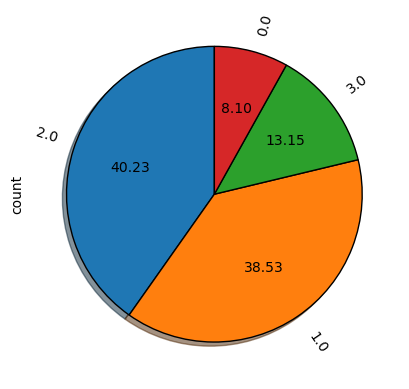

In [60]:
df['balcony'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

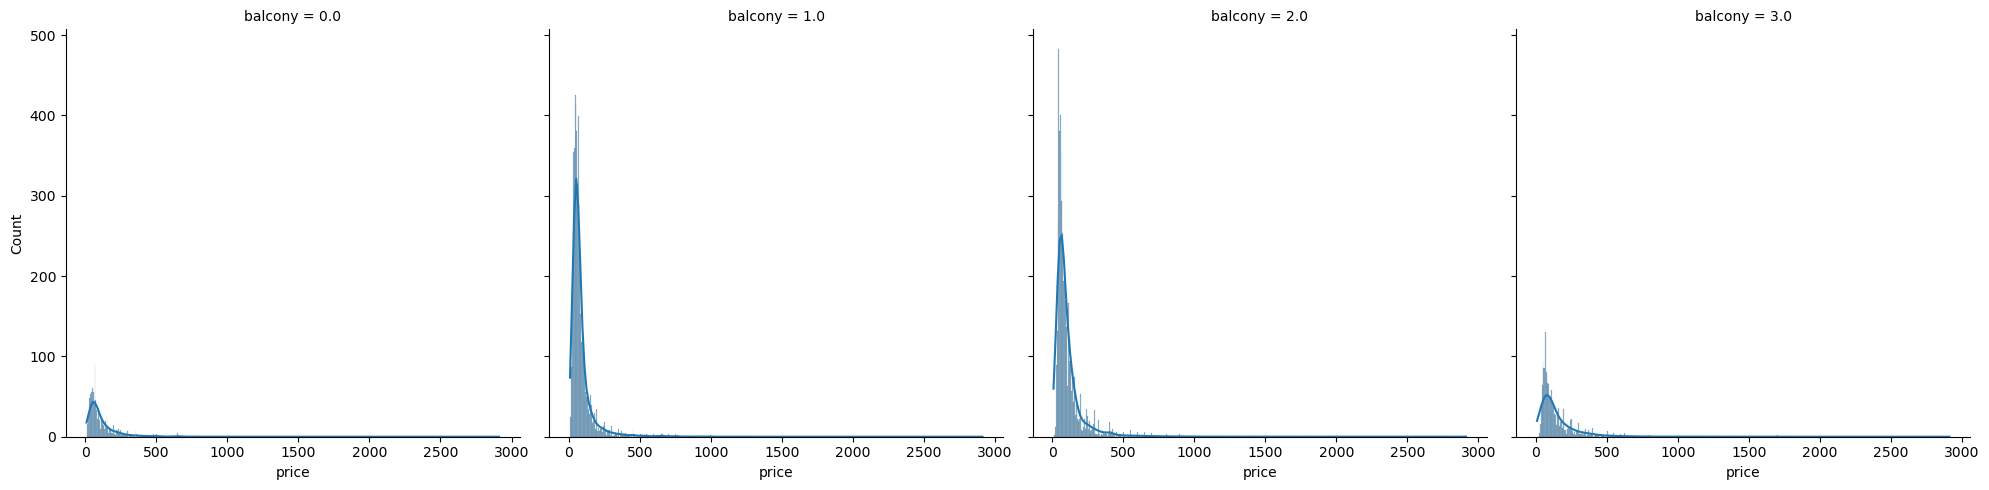

In [62]:
sns.displot(df, x="price", col="balcony", kde=True, col_wrap=4)
plt.show()

since there are only four categories and pdf is almost similar in all so this feature doesn't impact price that much so it will get dropped

In [64]:
df.drop(columns=['balcony'],inplace=True)

In [65]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
3522,Kundalahalli,1397.0,3.0,110.00,3,7874.015748
11159,Old Madras Road,1157.0,2.0,47.32,2,4089.887640
11364,TC Palaya,1440.0,5.0,97.00,5,6736.111111


<h4>analysis of all coulmn is done now only things left is detecting and removing outliers</h4>

<h2>Outlier's detection and removal:</h2>

In [68]:
df.sample(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
10579,Whitefield,2135.0,3.0,149.0,4,6978.922717
534,Hebbal,2400.0,4.0,245.0,3,10208.333333
9490,other,2800.0,4.0,365.0,4,13035.714286


In [69]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07
